<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **PROJETO** | SQL: Análise de Crédito
Caderno de **Informações**<br>
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)
Aluno [Gabriel Melfa](https://www.linkedin.com/in/gabrielmelfa/)
---

# **Tópicos**

<ol type="1">
  <li>O projeto;</li>
  <li>Análise Exploratória;</li>
  <li>Conclusão;</li>
</ol>

# O PROJETO

Este projeto utiliza uma subamostra do dataset original do professor André Perez, podendo apresentar diferentes proporções nas categorias e menor precisão nas estimativas em comparação ao conjunto completo. Os resultados obtidos têm finalidade didática e demonstrativa para portfólio, sendo que as queries desenvolvidas podem ser aplicadas ao dataset original para análises mais robustas e conclusões mais precisas.



*   Portifólio: https://github.com/gmelfa/
*   Linkedin: https://www.linkedin.com/in/gabrielmelfa/





---

In [ ]:
import pandas as pd

# **2. Análise exploratória**

Criação da tabela no AWS para realização de algumas querys e assim iniciar a análise do csv

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
```


In [ ]:
#Visualização dos 10 primeiros itens da tabela
pd.read_csv ('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query1.csv')

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


**Quantidade de linhas do arquivo:**
```sql
SELECT COUNT(*) AS quantidade_linhas
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query2.csv')

,quantidade_linhas
0,2564


**Os tipos de dados em cada coluna:**
```sql
DESCRIBE credito;
```

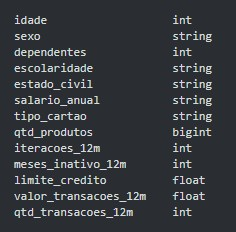

Legenda:

*   int tipo inteiro (numérico);
*   string tipo texto ou cadeia de caracteres;
*   bigint tipo inteiro longo (um número inteiro maior do que o tipo int);
*   float tipo número de ponto flutuante (um número com parte fracionária).

# **Abaixo considerei algumas variaveis da tabela:**

ESCOLARIDADE


```sql
SELECT DISTINCT escolaridade
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query4.csv')

,escolaridade
0,mestrado
1,graduacao
2,doutorado
3,sem educacao formal
4,ensino medio
5,na


SEXO

```sql
SELECT DISTINCT sexo
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query6.csv')

,sexo
0,M
1,F


ESTADO CIVIL

```sql
SELECT DISTINCT estado_civil
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query5.csv')

,estado_civil
0,divorciado
1,solteiro
2,casado
3,na


# **QUANTIDADE DE CLIENTES POR FAIXA SALARIAL**

```sql
SELECT salario_anual,
    COUNT(*) AS quantidade
FROM credito
GROUP BY salario_anual
ORDER BY CASE
        salario_anual
        WHEN 'menos que $40K' THEN 1
        WHEN '$40K - $60K' THEN 2
        WHEN '$60K - $80K' THEN 3
        WHEN '$80K - $120K' THEN 4
        WHEN '$120K +' THEN 5 ELSE 6
    END;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query7.csv')

,salario_anual,quantidade
0,menos que $40K,701
1,$40K - $60K,467
2,$60K - $80K,451
3,$80K - $120K,488
4,$120K +,222
5,na,235


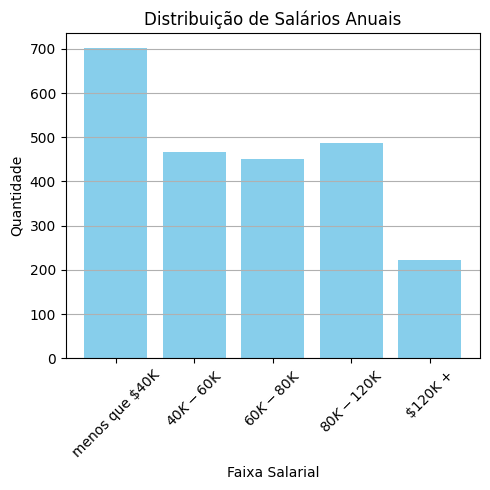

In [ ]:
import matplotlib.pyplot as plt

# Leitura do arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query7.csv')

#remoção do valor "na"
df = df[df['salario_anual'] != 'na']

# Criação do gráfico de barras
plt.figure(figsize=(5, 5))
plt.bar(df['salario_anual'], df['quantidade'], color='skyblue')

# Personalização do gráfico
plt.title('Distribuição de Salários Anuais')
plt.xlabel('Faixa Salarial')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Exibir o gráfico
plt.show()

Podemos fazer uma breve análise que a maioria dos clientes recebem salários anuais inferiores a 40k enquanto a minoria recebem salários acima de 120k.

## **Quantidade de clientes por tipo de cartão**

```sql
SELECT tipo_cartao,
    COUNT(*) AS quantidade
FROM credito
GROUP BY tipo_cartao
ORDER BY quantidade DESC;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query8.csv')

,tipo_cartao,quantidade
0,blue,2453
1,silver,93
2,gold,16
3,platinum,2


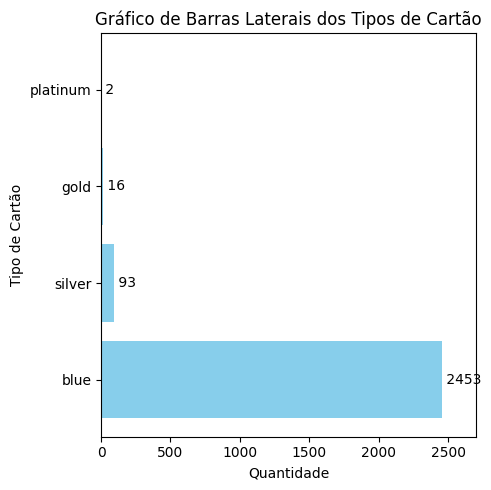

In [ ]:
# Carregar os dados
df = pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query8.csv')

# Criar o gráfico de barras horizontais
plt.figure(figsize=(5, 5))
plt.barh(df['tipo_cartao'], df['quantidade'], color='skyblue')

# Personalizar o gráfico
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Cartão')
plt.title('Gráfico de Barras Laterais dos Tipos de Cartão')

# Adicionar os valores nas barras
for i, v in enumerate(df['quantidade']):
    plt.text(v, i, f' {v}', va='center')

# Ajustar os limites do eixo x para melhor visualização
plt.xlim(0, max(df['quantidade']) * 1.1)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Agora fazendo uma segunda análise de clientes, a grande maioria possuí o cartão Blue, corroborando com a análise anterior sobre a maioria ter um sálario abaixo de 40k.

# **Quantidade de clientes por sexo**

```sql
SELECT sexo,
    COUNT(*) AS quantidade
FROM credito
GROUP BY sexo
ORDER BY quantidade DESC;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query9.csv')

,sexo,quantidade
0,M,1563
1,F,1001


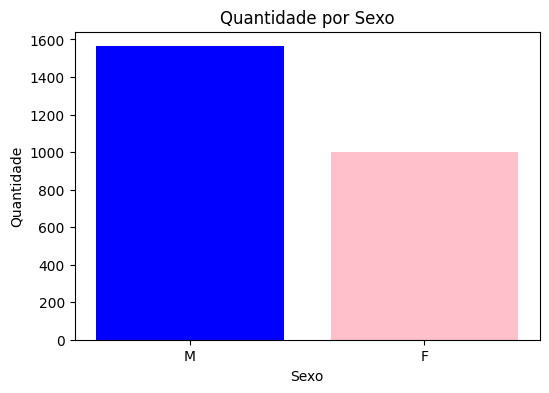

In [ ]:
# Carregar os dados
data = pd.read_csv("https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query9.csv")

# Criar gráfico em barras
plt.figure(figsize=(6, 4))
plt.bar(data['sexo'], data['quantidade'], color=['blue', 'pink'])
plt.title('Quantidade por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()

Podemos ver que a quantidade de homens é expressivamente maior que de mulheres, devemos levar isso em conta caso façamos algum tipo de abordagem de novos clientes ou manobras promocionais.

# **Média, Minima e Máxima de idade**

```sql
SELECT ROUND(AVG(idade)) AS idade_media,
    MIN(idade) AS idade_minima,
    MAX(idade) AS idade_maxima
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query10.csv')

,idade_media,idade_minima,idade_maxima
0,46.0,26,73


# **Média, Mínimo e Máximo do gasto Salarial**

```sql
SELECT ROUND(AVG(valor_transacoes_12m), 2) AS valor_medio_transacoes,
    MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
    MAX(valor_transacoes_12m) AS valor_maximo_transacoes
FROM credito;
```

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query11.csv')

,valor_medio_transacoes,valor_minimo_transacoes,valor_maximo_transacoes
0,1820.33,510.16,4776.58


# **Quantidade e valor de transações (idade, sexo, estado civil)**

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/gmelfa/ProjetoSQL/refs/heads/main/query12.csv')

,quantidade,sexo,estado_civil,valor_minimo_transacoes,valor_maximo_transacoes,valor_medio_transacoes
0,69,F,divorciado,1039.44,4370.80,2024.6688
1,92,M,divorciado,781.27,4605.89,1959.7296
2,308,F,solteiro,777.75,4776.58,2035.2687
3,458,M,solteiro,530.36,4686.93,1978.7189
4,591,F,casado,510.16,4740.94,1707.7339
5,930,M,casado,563.93,4542.69,1723.0211


# ***Padrões Observados***
Por Estado Civil
Divorciados mantêm um padrão de transações mais elevado que casados
Solteiros apresentam os maiores valores médios de transações.


---


Por Gênero
Mulheres têm valores médios de transações ligeiramente superiores aos homens em todas as categorias de estado civil
A diferença é mais pronunciada entre divorciados, onde mulheres têm média de 2.024,66 reais contra 1.959,72 reais dos homens apesar de ser pequena essa diferença.

# **3 - CONCLUSÃO DA ANÁLISE EXPLORATÓRIA E POSSÍVEL AÇÃO DE MARKETING**

Análise resumida do perfil de clientes e comportamentos de transação:
* Maioria tem salário  inferior a 40k anual, cartão blue e limites baixos
* Homens possuem limites maiores que mulheres, porém há desbalanceamento na base
* Clientes casados lideram em transações; divorciados fazem menos transações mas com valores maiores
* Por gênero e estado civil:
Homens solteiros/divorciados: mais transações que mulheres
Casados: transações equilibradas entre gêneros
* Cartão blue tem menores limites; limite aumenta conforme salário em todas categorias
Recomendação para marketing:
Focar em clientes casados, cartão blue e salário 40k, visando otimizar recursos e aumentar engajamento.